In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read Data from excel file .
data = pd.read_csv('heart.csv')

#Input / features
X = np.array(data[['trestbps','chol','thalach','oldpeak']])

#Output / target
Y = np.array(data['target'])
rows, cols = X.shape

# add new term to input .
X = np.concatenate([np.ones((rows, 1)), X], axis=1)


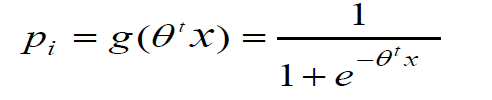

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  

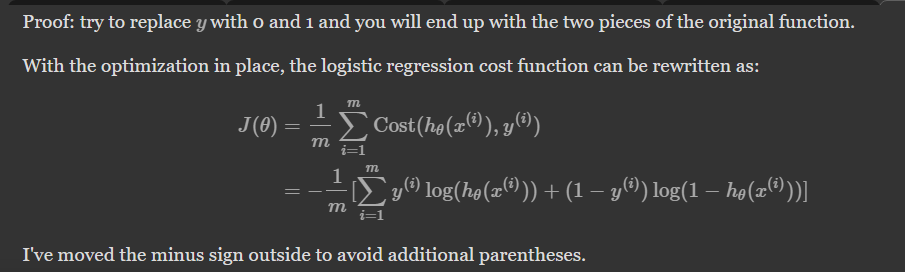

In [5]:
def costFunction(theta, X, y):
    m = y.size
    return -(1/m)* np.sum( y*np.log(sigmoid(np.dot(X,theta))) + (1-y)*np.log(1-sigmoid(np.dot(X,theta))) ) 

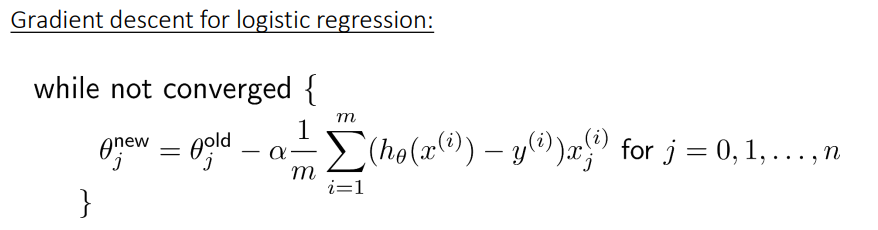

In [6]:
def gradiantDescent(alpha , theta , X , y , iterations):
    m = X.shape[0] # num of rows = 303 in this case.
    CostFunction = []
    theta = theta.copy()
    for i in range(iterations):
        theta = theta - (alpha / m) *   ((np.dot(X.T, ( sigmoid(np.dot(X,theta)) - y ))) )
        CostFunction.append( costFunction(theta, X, y) )
        
    return theta , CostFunction


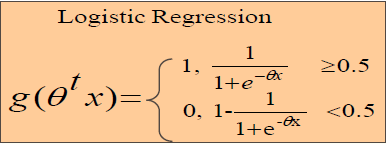

In [7]:
def predict(theta, X):
    m = X.shape[0]
    Predict_list = np.zeros(m)
    for i in range(m):
        if(sigmoid(np.dot(X[i], theta)) >=0.5 ):
                  Predict_list[i] = 1
        else:       
                  Predict_list[i] = 0       
    return  Predict_list

In [12]:
# Test (1)
# 0.000081  30000   73 %
# 0.00005   10000   71 %
# 0.000009  30000   70 %


intial_theta = np.zeros(X.shape[1])
theta , CostFunction = gradiantDescent(0.000081, intial_theta , X , Y , 30000)
print('Optimized Theta : ' , theta)
Predict_list = predict(theta, X)
print('Train Accuracy: {:.5f} %'.format(np.mean( Predict_list == Y) * 100))
print("Cost: ",CostFunction)


Optimized Theta :  [-0.01263236 -0.02317481 -0.00474725  0.03178589 -0.29559027]
Train Accuracy: 73.26733 %
Cost:  [0.6911535779236779, 0.6890920020444903, 0.687365505566934, 0.6855096764059045, 0.6840393466645731, 0.6823636171996769, 0.6811341093901198, 0.6796074733075909, 0.6785973514473173, 0.6771835464061557, 0.6763643658991546, 0.6750233157539117, 0.6743599069747532, 0.673050529826736, 0.6725026633628857, 0.6711866208339377, 0.6707118473268668, 0.6693574166195287, 0.6689145058425396, 0.6674996297044783, 0.667051857469446, 0.6655656592390413, 0.6650832865309797, 0.6635258247164838, 0.662987416298687, 0.6613679621643591, 0.6607605446628914, 0.6590949858375179, 0.6584133036671111, 0.6567213314008409, 0.6559665627022668, 0.6542691519133957, 0.6534474197069357, 0.6517648809763955, 0.6508857996506984, 0.6492364735125534, 0.648311865114014, 0.6467113909930796, 0.6457542222547624, 0.6442152506233559, 0.6432387895184292, 0.6417709961520416, 0.6407881616390285, 0.6393984428785472, 0.6384213

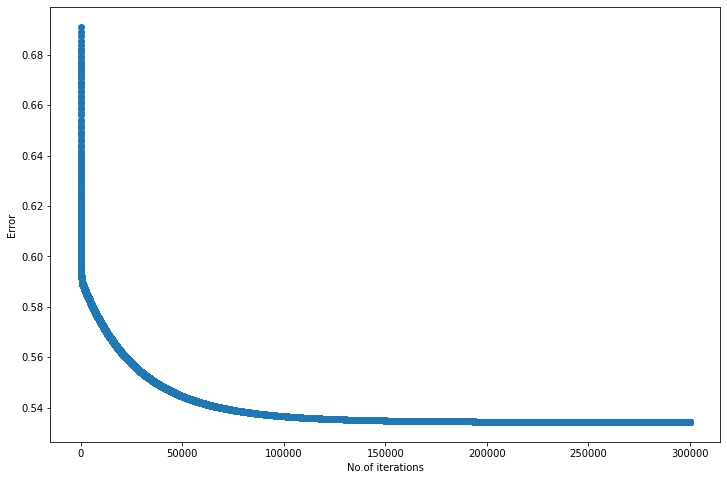

In [11]:
def plotConvergence(CostFunction):
    plt.figure(figsize=(12,8))
    plt.scatter(range(0, len(CostFunction)), CostFunction)
    plt.xlabel("No.of iterations")
    plt.ylabel("Error")
plotConvergence(CostFunction)
plt.show()

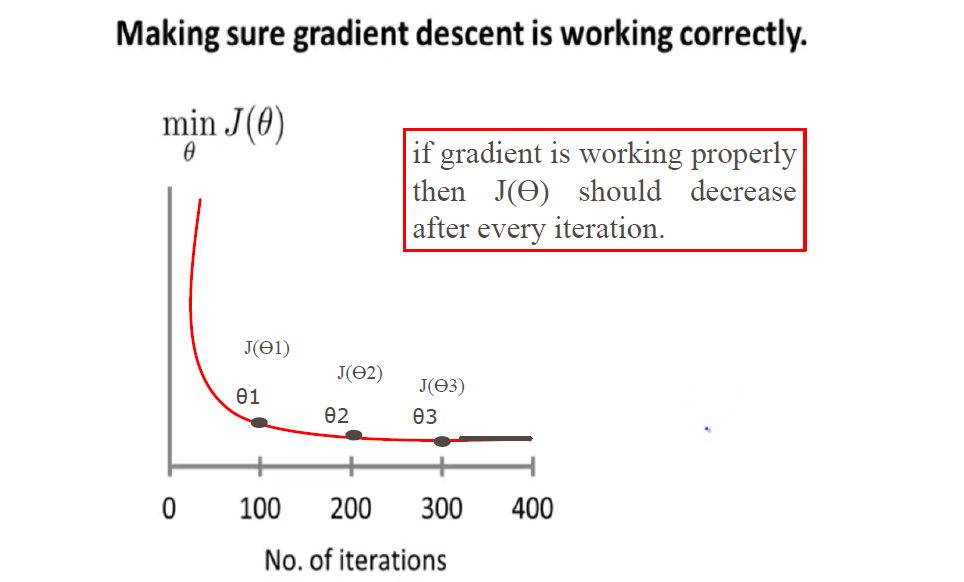